# Homework 2 - Programming Question
##### Fernando Sckaff
##### Feb 6th, 2023
Write a program to roughly carry out the optimization problem inherent in ∥𝐴∥∞. The program should take an arbitrary 𝑚 × 𝑛 matrix 𝐴 and sample over 100000 random vectors 𝑥 ∈ R^𝑛 (and use Gaussian random numbers) to approximately pick the maximum. Compute and empirically show that the analytic solution is an upper bound for the search.

OBS: The infinity norm simply measures how large the vector is by the magnitude of its largest entry.

## Import libraries and initialize variables

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 9                       # Number of rows
n = 6                       # Number of columns
A = np.random.randn(m,n)    # Setting up random A
N = 100000                  # Number of samples of x
x = np.random.randn(n,N)    # Setting up x
y = A @ x                   # Setting up y = A @ x

## Norm of a matrix is the norm of its output over its input
From our first objective function in our class, we know that the norm of matrix A equals the norm of Ax over the norm of x.

Let's estimate the norm of A as stated above, and calculate the L_inf normalization of Ax and x.

In [ ]:
# Infinity Norm of its output, y(9x100k), by Maximum Absolute Row Sum:
y_inf_norm = np.max(np.sum(np.abs(y),1))

# Infinity Norm of its output, x(6x100k):
x_inf_norm = np.max(np.sum(np.abs(x),1))

## Now, let's calculate the exact $L_\inf$ norm of A, and print the differences

In [ ]:
# Computing the main ratio in the matrix norm calculation
A_L_inf_norm_est = y_inf_norm/x_inf_norm # OR A_L_inf_norm_est = np.linalg.norm(y,np.inf)/np.linalg.norm(x,np.inf)

# Computing the MARS of A: maximum absolute row sum
A_L_inf_norm_exact = np.max(np.sum(np.abs(A),1)) # OR A_L_inf_norm_exact = np.linalg.norm(A,np.inf)

print("Matrix L-inf norm estimate: {:.4f}, Matrix L-inf norm exact: {:.4f}".format(\
    A_L_inf_norm_est, A_L_inf_norm_exact))

Matrix L-inf norm estimate: 3.4892, Matrix L-inf norm exact: 7.3694


## Distribution of the rows of Ax (not normalized\\not divided ||x||)

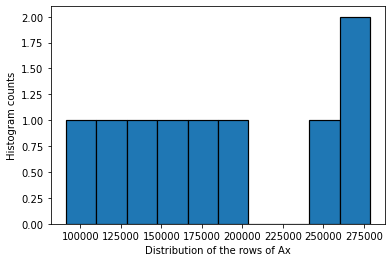

In [ ]:
# Shortage of samples and transforming into a higher dimension matrix made it harder
# for me to calculate the stretchness of a particular vector (since an individual
# output vector is a combination of multiple input vectors).
#
# Therefore, here is the distribution of the rows of 100,000 random vectors after the A transformation

plt.figure()
plt.hist(np.sum(np.abs(y),1), edgecolor='black', linewidth=1.2)
plt.xlabel(r"Distribution of the rows of Ax")
plt.ylabel("Histogram counts")
plt.show()

## Calculating the upper bound and comparing

In [ ]:
# Computing an upper bound of the matrix norm objective
y_abs = np.abs(A) @ np.abs(x)   # Computing |A| @ |x|
A_L_inf_norm_bnd = np.max(np.sum(y_abs,1))/np.max(np.sum(np.abs(x),1)) # Computing the largest value of the per instance upper bound

# Printing stuff out
print("Matrix L_inf norm estimate: {:.4f},  Matrix L_inf norm bound: {:.4f}, Matrix L_inf norm exact: {:.4f}".format(\
    A_L_inf_norm_est,A_L_inf_norm_bnd,A_L_inf_norm_exact))


Matrix L_inf norm estimate: 3.4892,  Matrix L_inf norm bound: 7.3481, Matrix L_inf norm exact: 7.3694


In [ ]:
matrix_Linfnorm_obj = np.max(np.abs(y),0)/np.max(np.abs(x),0)

In [ ]:
matrix_Linfnorm_obj

array([1.45318137, 3.79505485, 2.36701736, ..., 2.96114933, 4.17864902,
       2.16558101])

## Conclusion

When dealing with the infinite norm of a non-squared matrix, it's hard to understand the influence between every vector into the creation of the output vector.

Because of that, manually calculating the infinity norm of its output Ax over the input x could only yield one result - _The difference between the vectors with the maximum value before and after the transformation._

In other words, we had 6 \[1x100,000\] vectors as an input, and 9 \[1x100,000\] vectors as output. Our L_inf estimation of A was poor essentially due to "low samples".

Because of the differences between the dimensions of the input and output, the norm doesn't give us as much information as a square matrix A would have. The L1 norm definitely outperforms the L-infinity norm in this specific case.

At the same time, the L_inf norm bound of A is very close to the L_inf of the norm exact of A.